In [12]:
!pip install scikit-learn==0.24.1
!pip install scikit-multilearn==0.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 30.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 KB 5.4 MB/s eta 0:00:00


In [13]:
import numpy as np
import pandas as pd

import ast

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import time

In [14]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.multiclass import OneVsRestClassifier
from skmultilearn.adapt import MLkNN
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from skmultilearn.problem_transform import LabelPowerset

from sklearn import metrics
from sklearn.metrics import hamming_loss, jaccard_score, f1_score, classification_report

In [144]:
# data = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/stackoverflow.csv')
# data = pd.read_csv('https://www.kaggle.com/stackoverflow/stacksample?select=Answers.csv')
data = pd.read_csv('/content/drive/MyDrive/Colab Files/tag_ktern/tag_dataset.csv')
data

,text,tags
0,01-MIC-G36 & 5.56 ERP Project-WSR V1.0-2804202...,WSR
1,01-MIC_G36 & 5.56 S4HANA_SCM_MOM_09062021.doc,"MoM,SCM"
2,01-MIC_G36 & 5.56 S4HANA_WSR_MOM_28042021.doc,"MoM,WSR"
3,02-MIC-G36 & 5.56 ERP Project-WSR V1.0-0605202...,WSR
4,02-MIC_G36 & 5.56 S4HANA_SCM_MOM_30062021.doc,"MoM,SCM"
...,...,...
2435,BL_FI_24-Cash Journal Summary Report.zip,WRICEF
2436,BL_FI_25 - BL_FI_30 ( 6 Obj ) - Cheque Print.zip,WRICEF
2437,BL_FI_31-Customer Statement.zip,WRICEF
2438,BL_FI_34-_ZFI_DAILY_COLLECTION_REPORT.zip,WRICEF


In [145]:
print('Shape of the dataset : ', data.shape)

Shape of the dataset :  (2440, 2)


In [146]:
data.dtypes

text    object
tags    object
dtype: object

In [1]:
import csv
import ast

input_file = '/content/lob_tags.xlsx'
output_file = '/content/lob_tags.csv'
import pandas as pd

df = pd.read_excel(input_file)

# create a new column with the tags as a list
df['tags'] = df['tags'].apply(lambda x: x.split(',') if isinstance(x, str) else [])


# save the result to a new CSV file
df.to_csv(output_file, index=False)


In [2]:
data = pd.read_csv(output_file)
data.head()


,text,tags
0,2VO QM Analytical Apps User Manual.pdf,['QM']
1,Costing Approved by Srini HCM PL.JPG,['HCM']
2,FICO TR Movement to PRD_Email proof.pdf,['FICO']
3,FICO TR Movement.pdf,['FICO']
4,FICO_Configuration Audit.pdf,['FICO']


In [3]:
data['tag_count'] = data['tags'].apply(lambda x : len(x.split()))
data

,text,tags,tag_count
0,2VO QM Analytical Apps User Manual.pdf,['QM'],1
1,Costing Approved by Srini HCM PL.JPG,['HCM'],1
2,FICO TR Movement to PRD_Email proof.pdf,['FICO'],1
3,FICO TR Movement.pdf,['FICO'],1
4,FICO_Configuration Audit.pdf,['FICO'],1
...,...,...,...
764,MHD PP_MM_QM_SD_FI_CO_EHSM_PM dated 7.pdf,"['MM', 'QM', 'SD', 'FI', 'CO', 'EHSM', 'PM']",7
765,MHD PP_MM_QM_SD_FI dated 8.pdf,"['MM', 'QM', 'SD', 'FI']",4
766,MHD PP_FI_CO_EHSM_PM dated 9.pdf,"['PP', 'FI', 'CO', 'EHSM', 'PM']",5
767,MHD PP_MM__EHSM_PM dated 10.pdf,"['PP', 'MM', 'EHSM', 'PM']",4


In [4]:
data.dtypes

text         object
tags         object
tag_count     int64
dtype: object

In [5]:
print(type(data['tags'].iloc[0]))

<class 'str'>


In [6]:
data['tags'] = data['tags'].apply(lambda x : ast.literal_eval(x))
print(type(data['tags'].iloc[0]))
"""when converting to other type from string 
its better to use eval() with abstract syntax tree(ast)
"""

<class 'list'>


'when converting to other type from string \nits better to use eval() with abstract syntax tree(ast)\n'

In [7]:
data.dtypes

text         object
tags         object
tag_count     int64
dtype: object

In [8]:
y = data['tags']
y
type(y[0])

list

In [9]:
print(data['tag_count'].value_counts())

1    701
2     52
8      7
3      4
4      3
7      1
5      1
Name: tag_count, dtype: int64


In [10]:
print( "Maximum number of tags in a question: ", data['tag_count'].max())
print( "Minimum number of tags in a question: ", data['tag_count'].min())
print( "Average number of tags in a question: ", round(data['tag_count'].mean(), 3))

Maximum number of tags in a question:  8
Minimum number of tags in a question:  1
Average number of tags in a question:  1.166


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frequency (log scaled)')

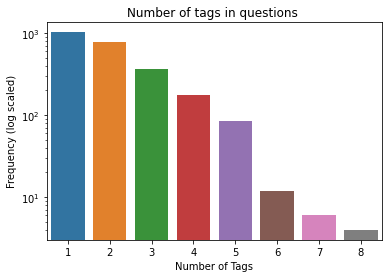

In [157]:
# fig = plt.gcf()
# fig.set_size_inches( 10, 8)
fig = sns.countplot(data['tag_count'])
plt.yscale('log')
plt.title("Number of tags in questions ")
plt.xlabel("Number of Tags")
plt.ylabel("Frequency (log scaled)")

In [15]:
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(data['tags'])

In [16]:
y

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 0, 1]])

In [17]:
mlb.classes_

array(['CO', 'EHSM', 'FI', 'FICO', 'HCM', 'MHD', 'MM', 'OM', 'PM', 'PP',
       'QM', 'SCM', 'SD'], dtype=object)

In [18]:
tagMatrix = pd.DataFrame(y, columns = mlb.classes_)
# tagMatrix
tagMatrix.shape

(769, 13)

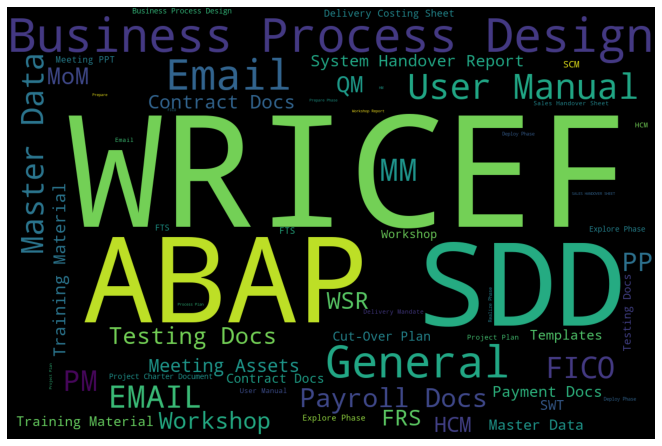

In [162]:
tag_freq_table = {}
for tag in tagMatrix.columns:
    # print(tag)
    tag_freq_table[tag] = tagMatrix[tag].sum()

# tag_freq_table
word_cloud = WordCloud(width=1200,height=800,).generate_from_frequencies(tag_freq_table)
plt.figure(figsize = (10,6))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)

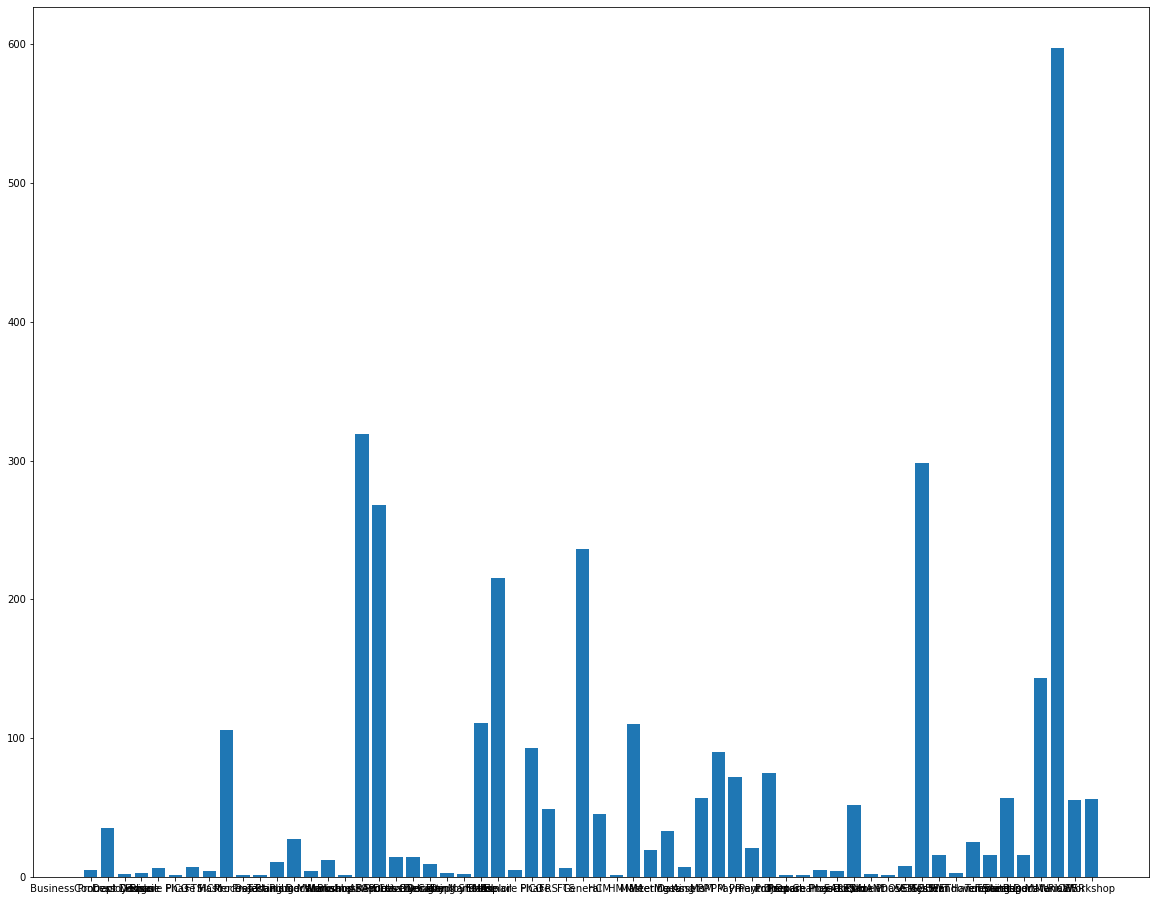

In [163]:
names = list(tag_freq_table.keys())
values = list(tag_freq_table.values())

plt.figure(figsize = (20,16))
plt.bar(range(len(tag_freq_table)),values,tick_label=names)
plt.show()

In [164]:
data['text'] = data['text'].fillna('')
tfidf = TfidfVectorizer(analyzer='word',ngram_range=(1,3), stop_words='english')
X = tfidf.fit_transform(data['text'])
X

<2440x13412 sparse matrix of type '<class 'numpy.float64'>'
	with 38359 stored elements in Compressed Sparse Row format>

In [165]:
# tfidf.vocabulary_
X.shape, y.shape

((2440, 13412), (2440, 60))

In [166]:
# X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size = 0.2, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size = 0.2)
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [167]:
def j_score(y_true, y_pred) :
    J = np.minimum(y_true, y_pred).sum(axis=1)/np.maximum(y_true, y_pred).sum(axis=1)
    return J.mean()*100

def print_score(y_pred, clf) :
    Jaccard_score = j_score(y_test, y_pred)
    print('\n--------------------------------------') 
    #print("classifier : ", clf.__class__.__name__)
    print("classifier : ", clf)
    print('Jaccard Score {}'.format(Jaccard_score))
    print('--------------------------------------\n')
    return Jaccard_score

In [168]:
from sklearn import metrics

# hold different prediction models in a single dictionary
models = {}
models["SGD"]                 = SGDClassifier(loss="hinge", penalty="l2", max_iter=20)
models["Logistic_lbfgs"]      = LogisticRegression(solver='lbfgs')
# models["SVC_1"]               = LinearSVC()
models["SVC_2"]               = LinearSVC(C=1.5, penalty = 'l1', dual=False)
# models["lp_logistic"]         = LabelPowerset(LogisticRegression())


model_results = []
model_names = []
JScores = []
precision = []
recall = []
F1_weighted = []

Hamming_loss = []

# sgd = SGDClassifier()
# lr  = LogisticRegression(solver='lbfgs')
# svc = LinearSVC()

# models = [sgd, lr, svc]

for model_name in models :
    model = models[model_name]
    
    clf = OneVsRestClassifier(model)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    
    J = print_score(y_pred, model)
    
    report_dict = classification_report(y_test, y_pred, target_names=mlb.classes_, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()
    print(report_df[-4:])
    
    model_names.append(model_name)
    JScores.append(J)

    # precision.append(f1_score(y_train, y_pred, average='micro')) 
    # ValueError: Found input variables with inconsistent numbers of samples: [39180, 9796]

    # precision.append(metrics.precision_score(y_train, y_pred, average='micro')) 
    # ValueError: Found input variables with inconsistent numbers of samples: [39180, 9796] 
    
    # recall.append(metrics.recall_score(y_train, y_pred, average='macro'))
    # ValueError: Found input variables with inconsistent numbers of samples: [39180, 9796] 

    # F1_weighted.append(metrics.f1_score(y_train, y_pred, average='weighted'))
    # ValueError: Found input variables with inconsistent numbers of samples: [39180, 9796] 

    Hamming_loss.append(hamming_loss(y_test, y_pred))

    #issue : got different values cmopared to previous run , may be because of randomness



--------------------------------------
classifier :  SGDClassifier(max_iter=20)
Jaccard Score 79.88387978142077
--------------------------------------

              precision    recall  f1-score  support
micro avg      0.978686  0.802038  0.881600    687.0
macro avg      0.562200  0.438573  0.482100    687.0
weighted avg   0.960373  0.802038  0.863834    687.0
samples avg    0.830943  0.801230  0.810314    687.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



--------------------------------------
classifier :  LogisticRegression()
Jaccard Score 41.99112021857923
--------------------------------------

              precision    recall  f1-score  support
micro avg      0.993266  0.429403  0.599593    687.0
macro avg      0.226587  0.093707  0.121067    687.0
weighted avg   0.767207  0.429403  0.510954    687.0
samples avg    0.452869  0.419911  0.429918    687.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



--------------------------------------
classifier :  LinearSVC(C=1.5, dual=False, penalty='l1')
Jaccard Score 82.34289617486338
--------------------------------------

              precision    recall  f1-score  support
micro avg      0.961603  0.838428  0.895801    687.0
macro avg      0.499581  0.437011  0.458753    687.0
weighted avg   0.944197  0.838428  0.880692    687.0
samples avg    0.846995  0.833675  0.834631    687.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 864x576 with 0 Axes>

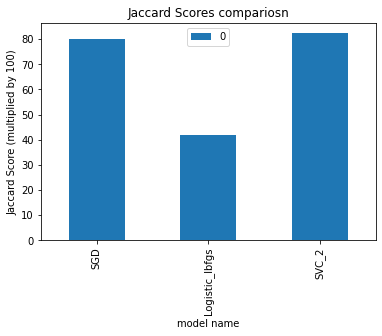

In [169]:
plt.figure(figsize = (12,8))
plotdata = pd.DataFrame(JScores, index=model_names)
# Plot a bar chart
plotdata.plot(kind="bar")
plt.title("Jaccard Scores compariosn")
plt.xlabel('model name')
plt.ylabel('Jaccard Score (multiplied by 100)')
plt.show()


<Figure size 864x576 with 0 Axes>

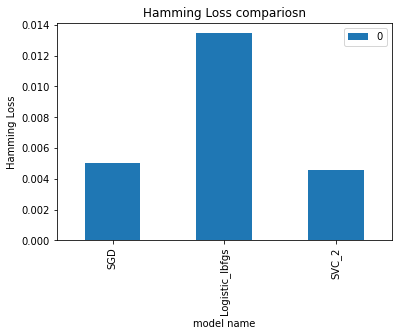

In [170]:
plt.figure(figsize = (12,8))
plotdata = pd.DataFrame(Hamming_loss, index=model_names)
# Plot a bar chart
plotdata.plot(kind="bar")
plt.title("Hamming Loss compariosn")
plt.xlabel('model name')
plt.ylabel('Hamming Loss')
plt.show()

In [171]:
report_dict = classification_report(y_test, y_pred, target_names=mlb.classes_, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
report_df[-4:]

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
micro avg,0.961603,0.838428,0.895801,687.0
macro avg,0.499581,0.437011,0.458753,687.0
weighted avg,0.944197,0.838428,0.880692,687.0
samples avg,0.846995,0.833675,0.834631,687.0


In [172]:
# print(jaccard_score(y_test, y_pred, average=None))
print("Jaccard score (samples average) : ", jaccard_score(y_test, y_pred, average='samples'))
print("Jaccard score (micro average) : ", jaccard_score(y_test, y_pred, average='micro'))
print("Jaccard score (macro average) : ", jaccard_score(y_test, y_pred, average='macro'))

Jaccard score (samples average) :  0.8234289617486339
Jaccard score (micro average) :  0.8112676056338028
Jaccard score (macro average) :  0.4181370625770708


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Jaccard is ill-defined and being set to 0.0 in labels with no true or predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [123]:
print("Please enter question(s) related to the following topics : ")
print(mlb.classes_)

Please enter question(s) related to the following topics : 
[' Business Process Design' ' Contract Docs' ' Deploy Phase' ' Email'
 ' Explore Phase' ' FICO' ' FTS' ' HCM' ' Master Data' ' Process Plan'
 ' Project Plan' ' Testing Docs' ' Training Material' ' User Manual'
 ' Workshop' ' Workshop Report' 'ABAP' 'Business Process Design'
 'Contract Docs' 'Cut-Over Plan' 'Delivery Costing Sheet'
 'Delivery Mandate' 'Deploy Phase' 'EMAIL' 'Email' 'Explore Phase' 'FICO'
 'FRS' 'FTS' 'General' 'HCM' 'HM' 'MM' 'Master Data' 'Meeting Assets'
 'Meeting PPT' 'MoM' 'PM' 'PP' 'Payment Docs' 'Payroll Docs' 'Prepare'
 'Prepare Phase' 'Project Charter Document' 'Project Plan' 'QM'
 'Realize Phase' 'SALES HANDOVER SHEET' 'SCM' 'SDD' 'SWT'
 'Sales Handover Sheet' 'System Handover Report' 'Templates'
 'Testing Docs' 'Training Material' 'User Manual' 'WRICEF' 'WSR'
 'Workshop']


In [173]:
models["MLkNN"] = clf

In [175]:
models

{'SGD': SGDClassifier(max_iter=20),
 'Logistic_lbfgs': LogisticRegression(),
 'SVC_2': LinearSVC(C=1.5, dual=False, penalty='l1'),
 'MLkNN': OneVsRestClassifier(estimator=LinearSVC(C=1.5, dual=False, penalty='l1'))}

In [176]:
while(True) :
    question = input("Please type your questiion bellow : ")
    temporary_list = []
    temporary_list.append(question)
    xt = tfidf.transform(temporary_list)
    del temporary_list
    y_hat = models['MLkNN'].predict(xt)
    tags = mlb.inverse_transform(y_hat)
    print("Predicted Tags : ", tags)

Please type your questiion bellow : 09-MIC-G36 & 5.56 ERP Project-WSR V1.0-28072021.pptx
Predicted Tags :  [('WSR',)]
Please type your questiion bellow : 04-MIC_G36 & 5.56 S4HANA_WSR_MOM_02062021.doc
Predicted Tags :  [('MoM', 'WSR')]
Please type your questiion bellow : K1.11 Risk Register-Template_V1.1.xlsx
Predicted Tags :  [('General',)]
Please type your questiion bellow : KBB_89_Data Security Design Template.docx
Predicted Tags :  [('SDD', 'Templates')]
Please type your questiion bellow : KT-MHD-MOM - Risk Identification Session V1.0.docx
Predicted Tags :  [('MoM',)]
Please type your questiion bellow : MHD Risk Register V1.1 20200521.xlsx
Predicted Tags :  [('General',)]
Please type your questiion bellow : Aramco_Material Digital Passport_Weekly Status Review_14122022_V1.0.pptx
Predicted Tags :  [()]
Please type your questiion bellow : "Aramco_Blockchain Material Digital Passport_Detailed Business Process_03082022_V2.0.pdf"
Predicted Tags :  [('WRICEF',)]
Please type your questiion

KeyboardInterrupt: ignored

In [126]:
while(True) :
    question = input("Please type your questiion bellow : ")
    temporary_list = []
    temporary_list.append(question)
    xt = tfidf.transform(temporary_list)
    del temporary_list
    y_hat = models['MLkNN'].predict(xt)
    tags = mlb.inverse_transform(y_hat)
    print("Predicted Tags : ", tags)

Please type your questiion bellow : 03-MIC_G36 & 5.56 S4HANA_WSR_MOM_26052021.doc


AttributeError: ignored